Maybe introductory reading
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

Might be interesting, too 
https://pdfs.semanticscholar.org/ef31/2e378325707b371c4727f6b1f9225fc03a9f.pdf
https://link.springer.com/content/pdf/10.1007/s001250051006.pdf
About 50 %of  Pima  adults  over  35 years  of  age  suffer  fromt his condition, refrence [4]

In [8]:
#Mise-en-place
# Load the needed python libraries
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#https://web.archive.org/web/20170710004116/https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes

#Load the data set into a dataframe
df = pd.read_csv('pima-indians-diabetes-from-archives.csv')
df.head() # Print the first five rows, to check whether the dataframe is loaded

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [4]:
df.dtypes

preg       int64
plas       int64
pres       int64
skin       int64
insu       int64
mass     float64
pedi     float64
age        int64
class      int64
dtype: object

In [9]:
#hm, there are no labels, so we need to set them
#use the information from Smith, J. W., Everhart, J. E., Dickson, W. C., Knowler, W. C., & Johannes, R. S. (1988, November). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus.
#we also need to load the data again without headers
df = pd.read_csv('pima-indians-diabetes-from-archives.csv', header=None)
df.columns = ['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age', 'class']
df.head()
#looks better now

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Information about the data

Title: Pima Indians Diabetes Database

Sources: (a) Original owners: National Institute of Diabetes and Digestive and Kidney Diseases (b) Donor of database: Vincent Sigillito (vgs@aplcen.apl.jhu.edu) Research Center, RMI Group Leader Applied Physics Laboratory The Johns Hopkins University Johns Hopkins Road Laurel, MD 20707 (301) 953-6231 © Date received: 9 May 1990

Past Usage:

    Smith,~J.~W., Everhart,~J.~E., Dickson,~W.~C., Knowler,~W.~C., & Johannes,~R.~S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In {it Proceedings of the Symposium on Computer Applications and Medical Care} (pp. 261–265). IEEE Computer Society Press.

    The diagnostic, binary-valued variable investigated is whether the patient shows signs of diabetes according to World Health Organization criteria (i.e., if the 2 hour post-load plasma glucose was at least 200 mg/dl at any survey examination or if found during routine medical care). The population lives near Phoenix, Arizona, USA.

    Results: Their ADAP algorithm makes a real-valued prediction between 0 and 1. This was transformed into a binary decision using a cutoff of 0.448. Using 576 training instances, the sensitivity and specificity of their algorithm was 76% on the remaining 192 instances.

Relevant Information: Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. ADAP is an adaptive learning routine that generates and executes digital analogs of perceptron-like devices. It is a unique algorithm; see the paper for details.

Number of Instances: 768

Number of Attributes: 8 plus class

For Each Attribute: (all numeric-valued)

    Number of times pregnant
    Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    Diastolic blood pressure (mm Hg)
    Triceps skin fold thickness (mm)
    2-Hour serum insulin (mu U/ml)
    Body mass index (weight in kg/(height in m)^2)
    Diabetes pedigree function
    Age (years)
    Class variable (0 or 1)

Missing Attribute Values: None

Class Distribution: (class value 1 is interpreted as “tested positive for diabetes”)

Class Value Number of instances 0 500 1 268

In [30]:
df.shape
print ("rows = " + str(df.shape[0]) + "; columns = " + str(df.shape[1]))

rows = 768; columns = 9


In [24]:
#print the data types
df.dtypes
#fill that into a series
s1 = df.dtypes
s1.name = 'Data types'

In [32]:
#see how unbalanced the dataset is
df['class'].value_counts()

0    500
1    268
Name: class, dtype: int64

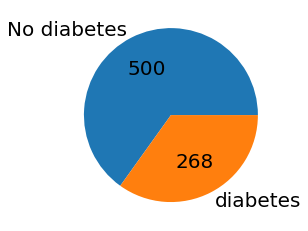

In [132]:
#Let's make a pie chart out of it
labels = 'No diabetes', 'diabetes'
plt.pie([500,268], labels=labels, autopct=lambda p: '{:.0f}'.format(p * 768 / 100))
plt.rc('font', size=36) 
plt.savefig('pie')

In [33]:
df = df.describe()
df.round(2)

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [18]:
from pandas.table.plotting import table # EDIT: see deprecation warnings below

ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, df)  # where df is your data frame

plt.savefig('mytable.png')
#apparently this is not working

ModuleNotFoundError: No module named 'pandas.table'

Observations:

value range between the observations is high - impact on model fitting later on to be taken into account

funny number: a lady that was 17times pregnant - ha ha

preg: huge differenece between 75% and max - outlier issue?
plas: min = 0 - Plasma of 0 realistic? how often does this occur?
pres: min = 0 - Blood pressure of 0 realistic? how often does this occur?
btw: we have no systolic blood pressure data - why?
skin: min = 0 realistic? and: difference from 75 to max also quite big - outlier
insulin: min = 0 realistic? hughe jumps within the quartiles, here again in particular from the 75 to to max - outlier - how many
mass = min - 0 bmi from 0 not possible, max 67 does not seem to be realistic
pedi = need to chech how they calculated this
age = it's a generally young population, and it does not start before 21 years old, but that's due to the study setting

In [22]:
#check for na
df.isnull().sum()
#looks fine, we can start with further analysis

preg     0
plas     0
pres     0
skin     0
insu     0
mass     0
pedi     0
age      0
class    0
dtype: int64

In [20]:
#fill that into a dataframe
s2 = df.isnull().sum()
s2.name = 'Is null?'

In [19]:
#differences between mean and median to get another impression about skewness and outlier issues
for i in range(len(df.columns)-1):
    diff = df[df.columns[i]].mean() - df[df.columns[i]].median()
    print(df.columns[i] + ": " + str(diff))

preg: 0.8450520833333335
plas: 3.89453125
pres: -2.89453125
skin: -2.463541666666668
insu: 49.29947916666667
mass: -0.007421875000023448
pedi: 0.0993763020833327
age: 4.240885416666664


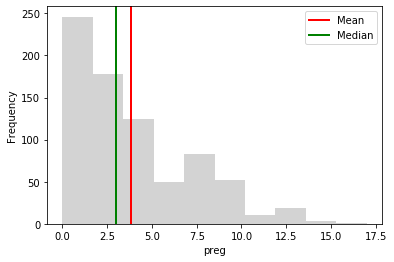

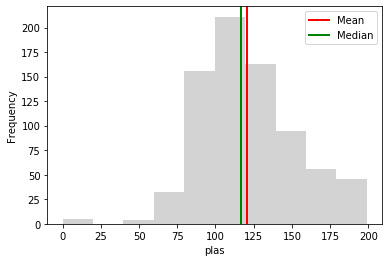

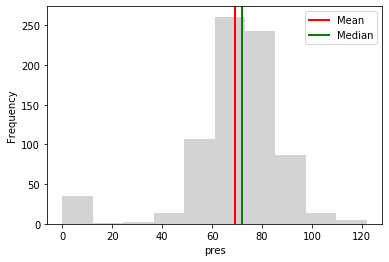

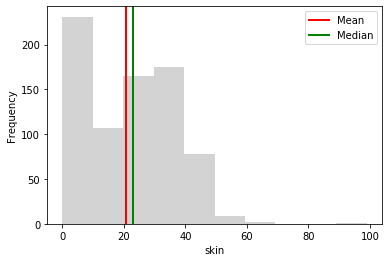

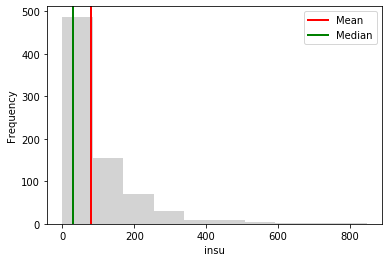

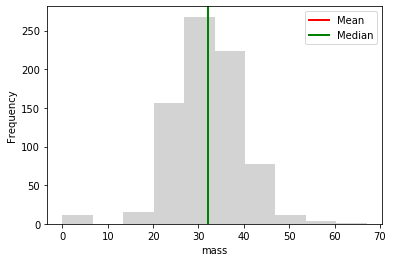

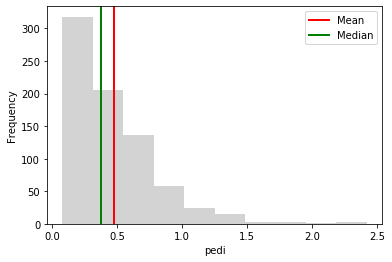

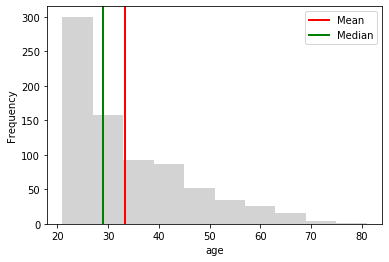

In [5]:
#plt.subplot(331)
#df['preg'].plot(kind="hist",fill=False,histtype='step',title='Tested negative', label="pregnant")
#ax_s.set_xlabel('times pregnant')
#ax_s.set_ylabel('n')
#plt.legend()

#plt.subplot(332)
#df['plas'].plot(kind="hist",fill=False,histtype='step',title='Tested negative', label="plasma")
#ax_s.set_xlabel('times pregnant')
#ax_s.set_ylabel('n')
#plt.legend()

#plt.subplot(333)
#df['pres'].plot(kind="hist",fill=False,histtype='step',title='Tested negative', label="diastolic")
#ax_s.set_xlabel('times pregnant')
#ax_s.set_ylabel('n')
#plt.legend()

#plt.subplot(334)
#df['skin'].plot(kind="hist",fill=False,histtype='step',title='Tested negative', label="triceps")
#ax_s.set_xlabel('times pregnant')
#ax_s.set_ylabel('n')
#plt.legend()

#start with some frequency histograms first
#ax = df['preg'].plot(kind="hist",fill=False,histtype='step',title='All observations', label="pregnant")
#ax.set_xlabel("Number of times pregnant")
#len(df.columns)

#ax_1 = df['age'].plot(kind="hist",fill=False,histtype='step',title='All observations', label="pregnant")
#ax_1.set_xlabel("Number of times pregnant")

#looping is more efficient
for i in range(len(df.columns)-1):
    plt.figure()
    plt.hist(df[df.columns[i]], color = 'lightgrey')
    plt.ylabel('Frequency')
    plt.xlabel(df.columns[i])
    plt.axvline(df[df.columns[i]].mean(), linewidth=2, color = 'r',label="Mean")
    plt.axvline(df[df.columns[i]].median(), linewidth=2, color = 'g', label='Median')
    plt.legend(loc='upper right')

In [21]:
#count the outliers
df[df==0].count()
#fill that into a series
s3 = df[df==0].count()
s3.name = 'zeros count'

In [25]:
#combine the series, start with 2
pd.concat([s1, s2, s3], axis=1)

,Data types,Is null?,zeros count
preg,int64,0,111
plas,int64,0,5
pres,int64,0,35
skin,int64,0,227
insu,int64,0,374
mass,float64,0,11
pedi,float64,0,0
age,int64,0,0
class,int64,0,500


Observations:
For preg i'm not concerned. of course a woman could have been not pregnant so far
but the numbers for insulin and skin a quite high - what to do with them? most likely we'll run into issues when thinking about regression

In [57]:
#let's have a look at the kurtosis and skewness
df.skew()

preg    0.901674
plas    0.173754
pres   -1.843608
skin    0.109372
insu    2.272251
mass   -0.428982
pedi    1.919911
age     1.129597
dtype: float64

Observations
Actually I dont know how to interpret this correctly

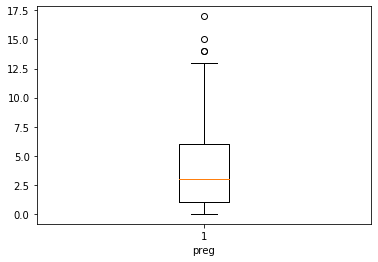

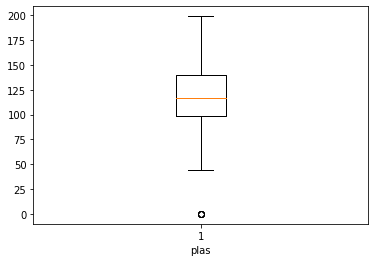

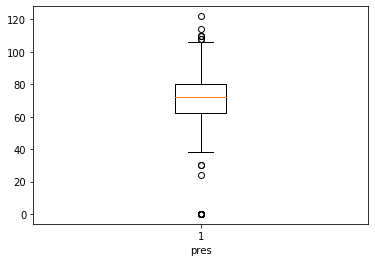

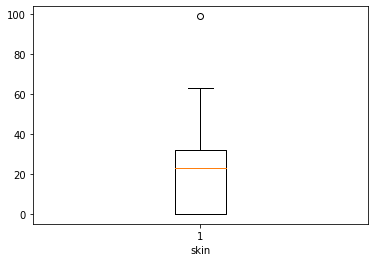

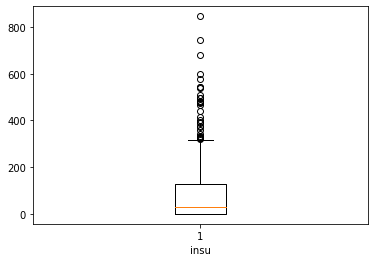

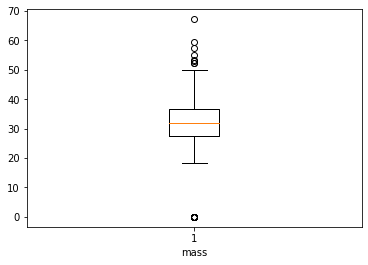

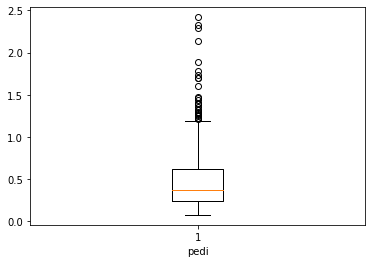

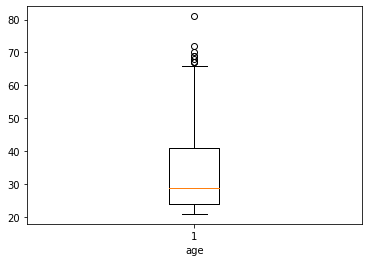

In [10]:
#ok, lets also do some boxplots, cuz i'm more familiar with that
for i in range(len(df.columns)-1):
    plt.figure()
    plt.boxplot(df[df.columns[i]])
    plt.xlabel(df.columns[i])  

In [12]:
#lets split the df into the 2 classes
#new
df_tneg = df[df['class']==0] 
df_tpos = df[df['class']==1]

In [21]:
#check values again
print("Count dataset diabetes negative: " + str(df_tneg[df_tneg.columns[0]].count()) + ": count dataset diabetes positive: " + str(df_tpos[df_tpos.columns[0]].count()))

Count dataset diabetes negative: 500: count dataset diabetes positive: 268


In [12]:
#now we move over to compare the two groups
df_tneg.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


In [13]:
df_tpos.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


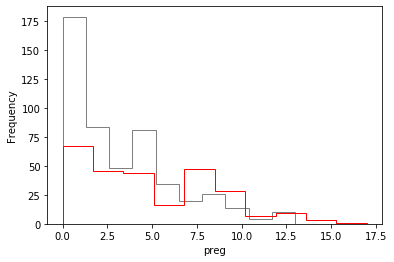

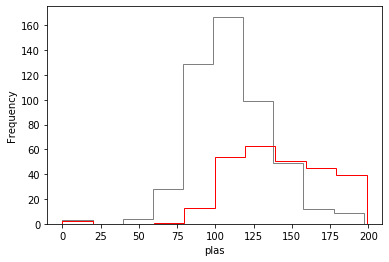

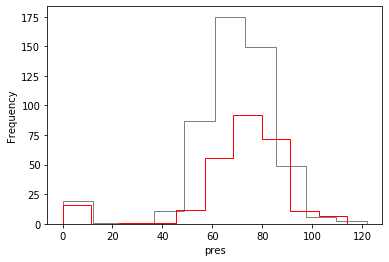

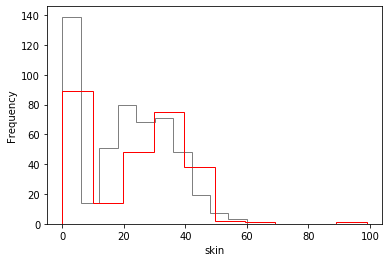

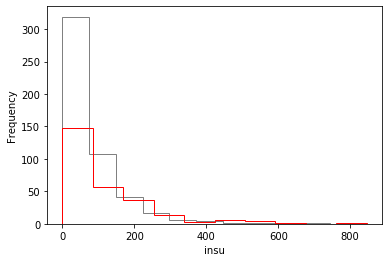

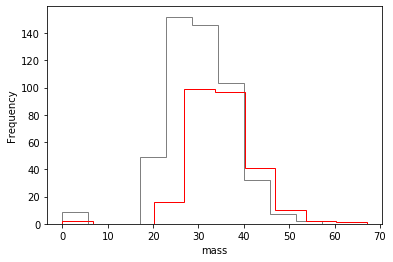

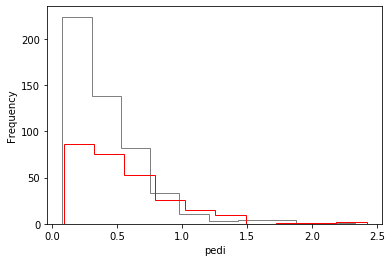

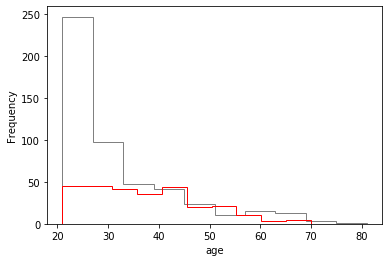

In [14]:
#lets do some histograms showing the two groups first
#looping is more efficient
for i in range(len(df.columns)-1):
    plt.figure()
    plt.hist(df_tneg[df_tneg.columns[i]], color = 'grey', histtype='step')
    plt.hist(df_tpos[df_tneg.columns[i]], color = 'r', histtype='step')
    plt.ylabel('Frequency')
    plt.xlabel(df.columns[i])
    #plt.axvline(df[df.columns[i]].mean(), linewidth=2, color = 'r',label="Mean")
    #plt.axvline(df[df.columns[i]].median(), linewidth=2, color = 'g', label='Median')
    #plt.legend(loc='upper right')

Observations:
all attributes some not to discriminate a lot
in the diabetes case the glucose level appear to be higher (shift to the right)
in the diabetes case the bmi level appear to be higher (shift to the right)

The shape of the attributes preg and age I find not ease to interpret, in the case of the age, it seems to be more eventy distributed, frequency as a direct measure of comparision we cannot use

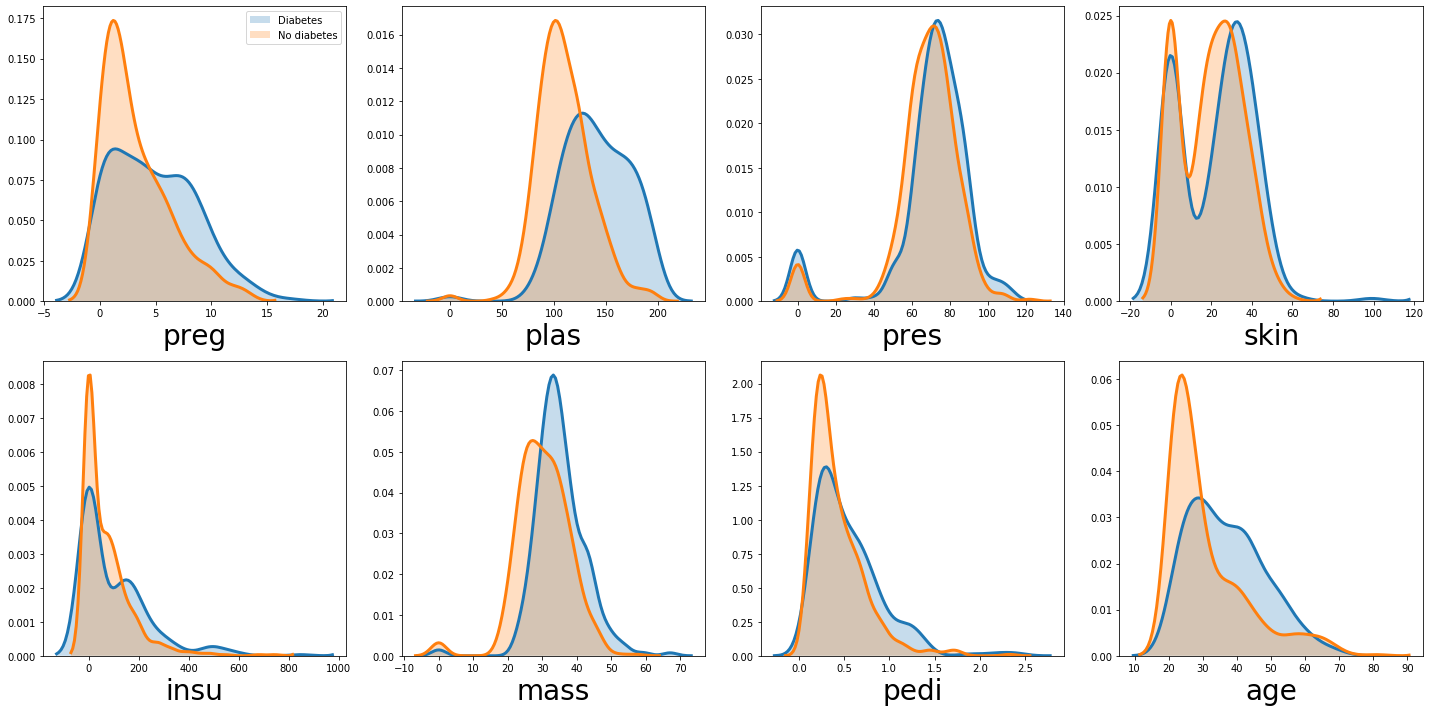

In [16]:
#lets do some kernel density plots to see the differences between the diabetes groups
f, axes = plt.subplots(2, 4,figsize=(20,10))
#fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
#plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
#plt.grid(False)
#plt.xlabel("common X")
#plt.ylabel("common Y")

count=0

# add a big axes, hide frame

for i in range(2):
    for j in range(4):
        count=count+1
        #sns.distplot(df_tpos[df_tpos.columns[count-1]],kde=True,hist=False,kde_kws = {'linewidth': 3, 'shade': True},label = 'Diabetes',ax = axes[i][j])
        sns.distplot(df_tpos[df_tpos.columns[count-1]],kde=True,hist=False,kde_kws = {'linewidth': 3, 'shade': True}, ax = axes[i][j])
        sns.distplot(df_tneg[df_tneg.columns[count-1]],kde=True,hist=False,kde_kws = {'linewidth': 3, 'shade': True}, ax = axes[i][j])
        if i < 1:
            axes[i, j].set_xlabel(df.columns[j], fontsize=28) 
        else:
            axes[i, j].set_xlabel(df.columns[j+4], fontsize=28)
            #axes[i][j].legend()
        #ax.set(ylabel='y-label')
#f.suptitle('KDEs')     
axes[0][0].legend(['Diabetes', 'No diabetes'])
plt.tight_layout()

#plt.show()
#plt.ylabel('Density')
#ax.set_ylabel('common ylabel')
#f.text(-0.02, 0.5, 'Density', va='center', rotation='vertical')
#f.legend((l1, l2), ('Line 1', 'Line 2'), 'upper left')
#plt.rc('font', size=22) 
plt.savefig('kdes-improved.png')

Observations: Diabetes cases are associated with greater times/levels of
    plasma glucose
    bodi mass index
    age

As a principle statement: Even by looking at the graphs - interpretations are not always that easy and straight forward


C:\Users\oxsan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\oxsan\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


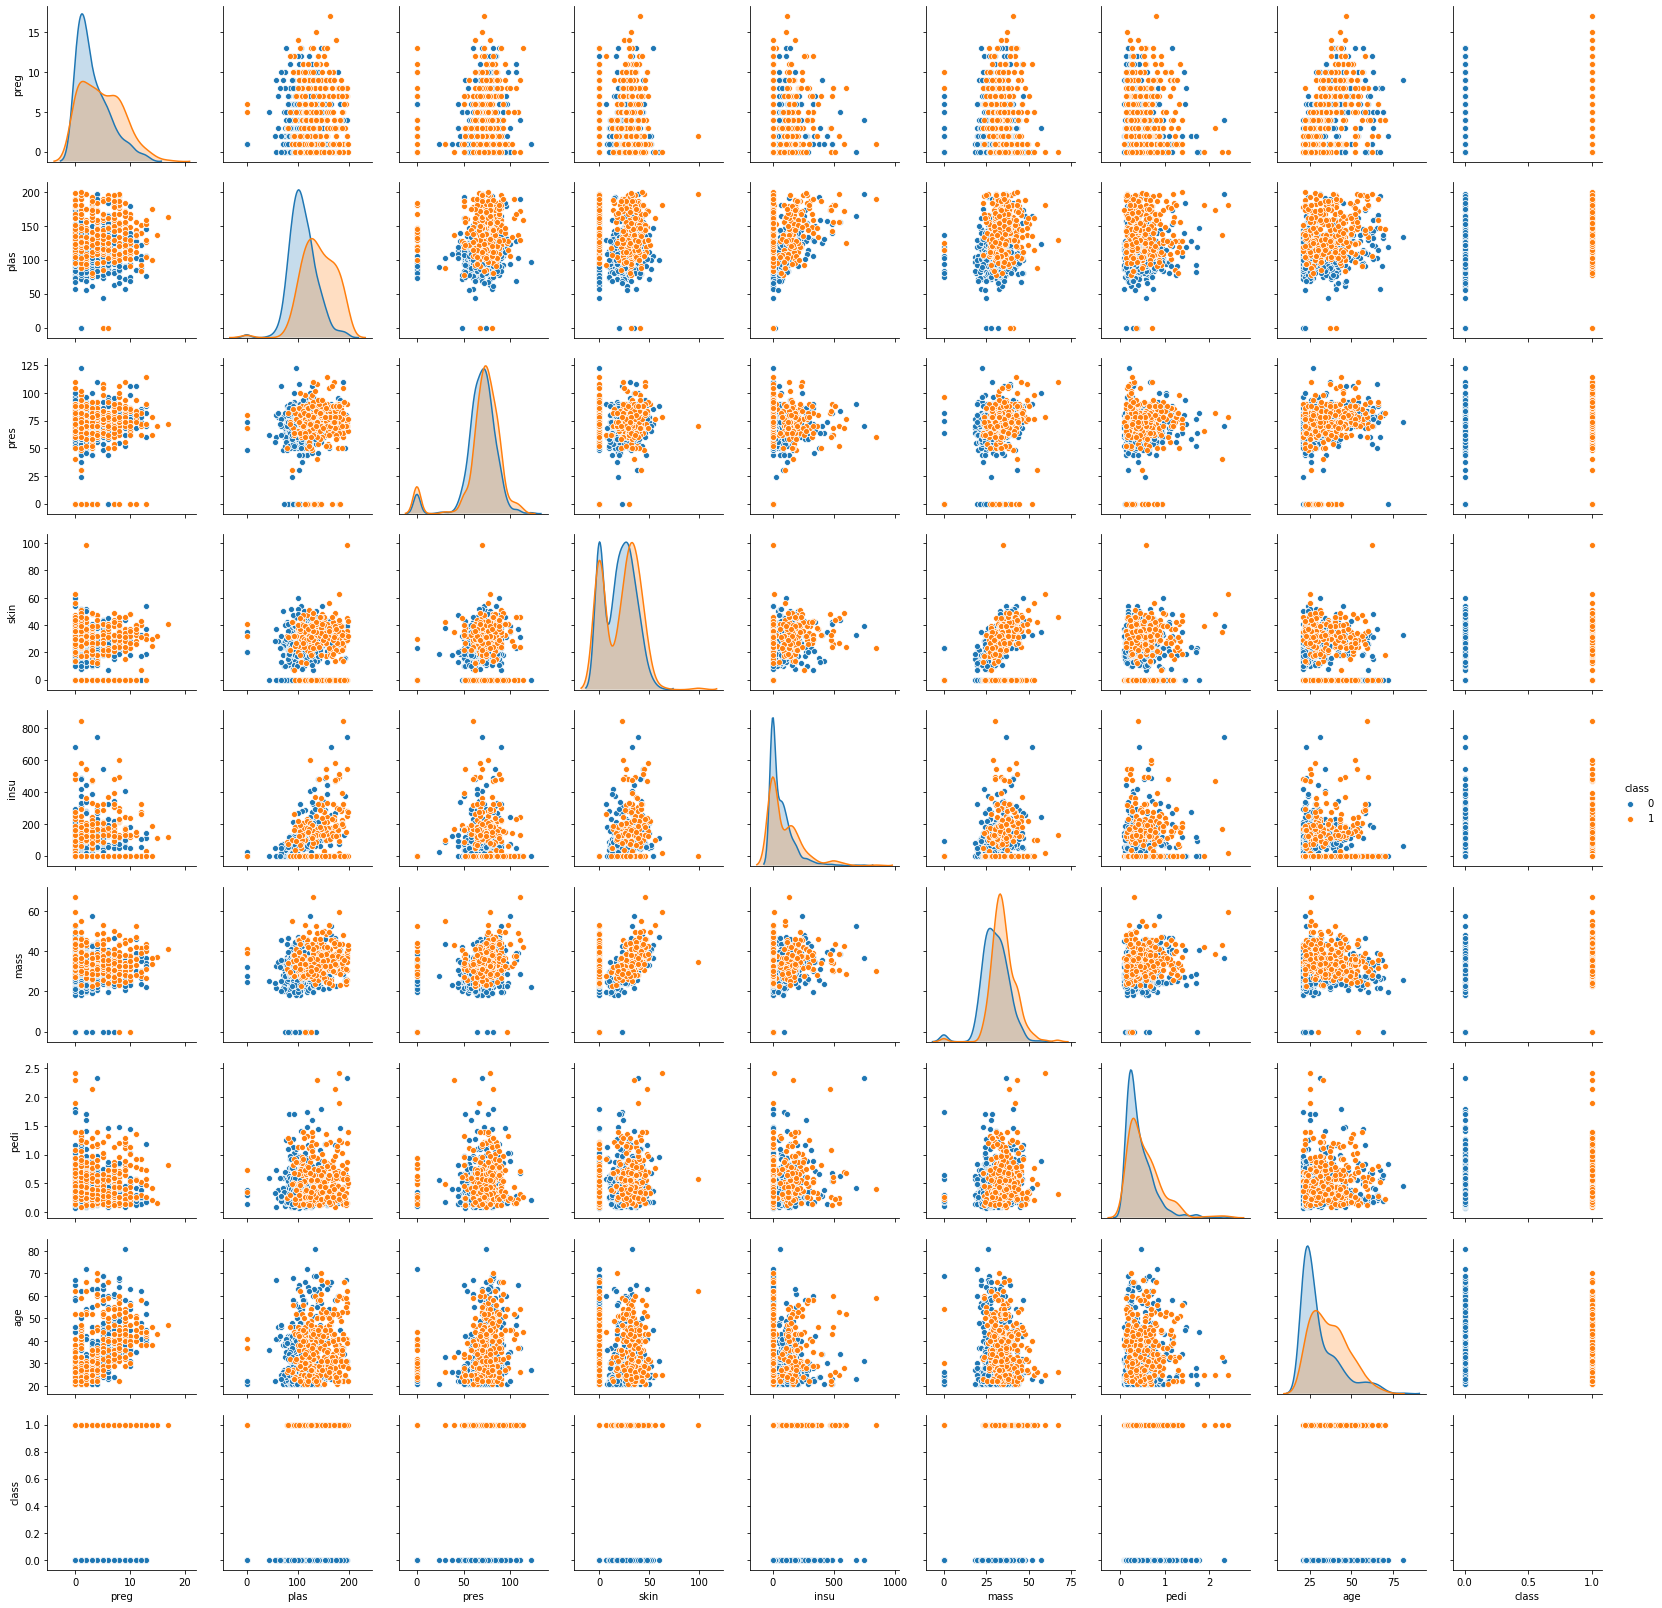

In [17]:
#found something cool in the internet, want to try out on our dataset
sns.pairplot(data=df,hue='class',diag_kind='kde')
plt.show()

Observation: visually no two attributes are able to clearly discrimiate the diabetes neg/pos class.
When including the class, than it seems like that higher values for plas lead to a higher likelihood of testing positive for diabetes, in particular when combined with higher values for mass
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5486871/        

C:\Users\oxsan\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
C:\Users\oxsan\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
C:\Users\oxsan\Anaconda3\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


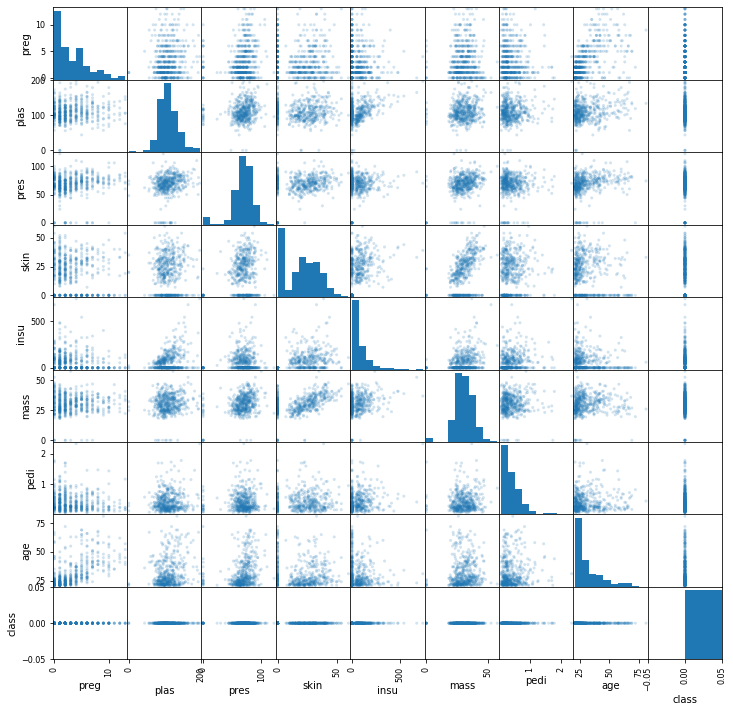

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[df['class']==0], alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.show()

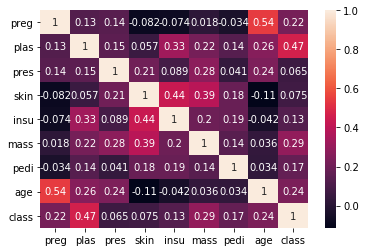

In [60]:
#corrs
corr= df.corr()
sns.heatmap(corr,annot=True)

Observations
age and number of pregnancies are moderetely positivley correlated - makes sense
insulin and skin as well as glucose seems to be positively correlated as well as bmi and skin

Now: What model to take? regression modell? cause Y will be explained by the independent variables

Which test to use?

https://rpubs.com/mihanshu/53192
It is not indicated whether the dataset I am using is a random sample or not, so I will have to assume that this is a random sample. Since I am assuming the data is a random sample, the independence condition is also met. While the data does appear to take the form of a cluster of points, it also does not appear to be in the form of a curve, and seems to follow a linear pattern. Shown below is a histogram of the residuals from the scatterplot above, which I will use to determine whether the BMI values are Normally distributed around the LSRL:

Matched and unmatched t-tests

There are two forms of the t-test. In the unmatched t-test, or independent t-test, it is assumed that the two samples are independent. In non-technical language, two samples are independent when knowing something about one does not affect what we know abou the other. For example, the average heights of men and women, drawn randomly from a population, are independent, since knowing the height of a particular man tells us nothing about the height of any particular woman. In a matched t-test, the two sample are not independent; for example, the heights of husbands and wives are not independent, since taller men may be married to taller women. More obviously, the length of people’s right and left feet are dependent, because knowing the size of a right foot tells us a lot about the size of the left foot.

In [10]:
#check for normality first - question: do we check the entire attribute, i.e. with both groups, or do we use per group
from scipy import stats
alpha = 0.05

for i in range(len(df.columns)-1):
    k2, p = stats.normaltest(df[df.columns[i]]) # D Agostino-Pearson. The method returns the test statistic value and the p-value
    print('Alpha = ',alpha)
    print('p = ',p)
    if p < alpha:  # null hypothesis: age in the dataset comes from a normal distribution
        print("The null hypothesis for attribute " + df.columns[i] + " can be rejected")
    else:
        print("The null hypothesis for attribute " + df.columns[i] + " cannot be rejected")

#interestingly I find a lot of t-tests in the literature, at seems like they don't care about the precondition

Alpha =  0.05
p =  3.9142916387836715e-18
The null hypothesis for attribute preg can be rejected
Alpha =  0.05
p =  0.0020446506991363502
The null hypothesis for attribute plas can be rejected
Alpha =  0.05
p =  3.780127075543807e-67
The null hypothesis for attribute pres can be rejected
Alpha =  0.05
p =  0.00017124157678801767
The null hypothesis for attribute skin can be rejected
Alpha =  0.05
p =  6.895342740914799e-85
The null hypothesis for attribute insu can be rejected
Alpha =  0.05
p =  1.9696869549260572e-19
The null hypothesis for attribute mass can be rejected
Alpha =  0.05
p =  1.2987697487612696e-70
The null hypothesis for attribute pedi can be rejected
Alpha =  0.05
p =  9.308980038236578e-27
The null hypothesis for attribute age can be rejected


Observation
variables are normally distributed - surprise

In [13]:
#now check for differences in variance - heteroscedasticity
#The Levene test tests the null hypothesis that all input samples are from populations with equal variances. Levene’s test is an alternative to Bartlett’s test bartlett in the case where there are significant deviations from normality.
#needs bartlett checked now - even more to worry - what method to use to check whether its far away from normality
#stats.levene(df_tneg[df.columns[0]], df_tpos[df.columns[0]])

for i in range(len(df.columns)-1):
    k2, p = stats.levene(df_tneg[df.columns[i]], df_tpos[df.columns[i]])
    print('Alpha = ',alpha)
    print('p = ',p)
    if p < alpha:  # null hypothesis: age in the dataset comes from a normal distribution
        print("The null hypothesis for attribute " + df.columns[i] + " can be rejected")
    else:
        print("The null hypothesis for attribute " + df.columns[i] + " cannot be rejected")

Alpha =  0.05
p =  2.212165915740029e-06
The null hypothesis for attribute preg can be rejected
Alpha =  0.05
p =  5.5118797543197775e-06
The null hypothesis for attribute plas can be rejected
Alpha =  0.05
p =  0.19111819437994088
The null hypothesis for attribute pres cannot be rejected
Alpha =  0.05
p =  0.0009752583265656849
The null hypothesis for attribute skin can be rejected
Alpha =  0.05
p =  2.7248886440415158e-05
The null hypothesis for attribute insu can be rejected
Alpha =  0.05
p =  0.10592424433411247
The null hypothesis for attribute mass cannot be rejected
Alpha =  0.05
p =  0.0006249834313215467
The null hypothesis for attribute pedi can be rejected
Alpha =  0.05
p =  0.13618591982127692
The null hypothesis for attribute age cannot be rejected


In [85]:
#now we are going to start with Mann-Whitney
alpha = 0.05
mw_wz = []
for i in range(len(df.columns)-1):
    stats, p = scipy.stats.mannwhitneyu(df_tneg[df.columns[i]],df_tpos[df.columns[i]])
    print('Alpha = ',alpha)
    print('p = ', p)
    mw_wz.append(round(p, 5))
    if p < alpha:  # null hypothesis: age in the dataset comes from a normal distribution
        print("The null hypothesis for attribute " + df.columns[i] + " can be rejected")
    else:
        print("The null hypothesis for attribute " + df.columns[i] + " cannot be rejected")

Alpha =  0.05
p =  1.872573207055431e-08
The null hypothesis for attribute preg can be rejected
Alpha =  0.05
p =  6.0036342099385686e-40
The null hypothesis for attribute plas can be rejected
Alpha =  0.05
p =  3.7792562301197405e-05
The null hypothesis for attribute pres can be rejected
Alpha =  0.05
p =  0.006480914779945946
The null hypothesis for attribute skin can be rejected
Alpha =  0.05
p =  0.03283018498912184
The null hypothesis for attribute insu can be rejected
Alpha =  0.05
p =  4.865394888063715e-18
The null hypothesis for attribute mass can be rejected
Alpha =  0.05
p =  5.982917206959746e-07
The null hypothesis for attribute pedi can be rejected
Alpha =  0.05
p =  5.711000589809503e-18
The null hypothesis for attribute age can be rejected


In [ ]:
Observation
The distributions do not come from the same population

In [99]:
#convert into series
mw_wz = pd.Series(data=mw_wz, index=['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
mw_wz
mw_wz.name = 'Mann Whitney with Zeros'

argh. I forgot to think about what the zero values mean
#this guy discussed the problem, that a lot of scientific studies run statistics without dealing with the missing values #J. Breault. Data mining diabetic databases: Are roughsets a useful addition? InProc. 33rd Symposium on theInterface, Computing Science and Statistics, Fairfax,VA, 2001

In [74]:
#if we want to drop zero values
df_woz = df[(df.plas != 0) & (df.pres != 0) & (df.skin != 0) & (df.insu != 0) & (df.mass !=0)]
#df_woz = df[(df.skin != 0)]
print(df_woz.shape)
df_woz.describe()

(392, 9)


,preg,plas,pres,skin,insu,mass,pedi,age,class
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [75]:
#split again
df_tneg_woz = df_woz[df_woz['class']==0] 
df_tpos_woz = df_woz[df_woz['class']==1]
df_tpos_woz.describe()

,preg,plas,pres,skin,insu,mass,pedi,age,class
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.0
mean,4.469231,145.192308,74.076923,32.961538,206.846154,35.777692,0.625585,35.938462,1.0
std,3.916153,29.839388,13.021518,9.642770,132.699898,6.734687,0.405910,10.634705,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.127000,21.000000,1.0
25%,1.000000,124.250000,66.500000,26.000000,127.500000,31.600000,0.329750,27.250000,1.0
50%,3.000000,144.500000,74.000000,33.000000,169.500000,34.600000,0.546000,33.000000,1.0
75%,7.000000,171.750000,82.000000,39.750000,239.250000,38.350000,0.786500,43.000000,1.0
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,60.000000,1.0


In [76]:
#repeat hyp testing
alpha = 0.05
mw_woz = []
for i in range(len(df_woz.columns)-1):
    stats, p = scipy.stats.mannwhitneyu(df_tneg_woz[df_woz.columns[i]],df_tpos_woz[df_woz.columns[i]])
    print('Alpha = ',alpha)
    print('p = ',p)
    mw_woz.append(round(p, 5))
    if p < alpha:  # null hypothesis: age in the dataset comes from a normal distribution
        print("The null hypothesis for attribute " + df_woz.columns[i] + " can be rejected")
    else:
        print("The null hypothesis for attribute " + df_woz.columns[i] + " cannot be rejected")

Alpha =  0.05
p =  3.7647711082937975e-05
The null hypothesis for attribute preg can be rejected
Alpha =  0.05
p =  3.064018270191058e-23
The null hypothesis for attribute plas can be rejected
Alpha =  0.05
p =  4.478703301509312e-05
The null hypothesis for attribute pres can be rejected
Alpha =  0.05
p =  1.346700535100721e-07
The null hypothesis for attribute skin can be rejected
Alpha =  0.05
p =  6.078625852178963e-14
The null hypothesis for attribute insu can be rejected
Alpha =  0.05
p =  6.436820186452493e-08
The null hypothesis for attribute mass can be rejected
Alpha =  0.05
p =  4.446860640238149e-05
The null hypothesis for attribute pedi can be rejected
Alpha =  0.05
p =  1.9718204800189343e-15
The null hypothesis for attribute age can be rejected


Observation
The p values differ from the test with the zeros, but all of the null hypothesis can still be rejected

In [101]:
#convert into series
mw_woz = pd.Series(data=mw_woz, index=['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
mw_woz
mw_woz.name = 'Mann Whitney w/o Zeros'

In [36]:
#fill both results into Series
hyp_wz = pd.Series(data=['p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05'],index=['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
hyp_wz.name = 'Mann Whitney with Zeros'
hyp_wz

preg    p < .05
plas    p < .05
pres    p < .05
skin    p < .05
insu    p < .05
mass    p < .05
pedi    p < .05
age     p < .05
Name: Mann Whitney with Zeros, dtype: object

In [37]:
hyp_woz = pd.Series(data=['p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05'],index=['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
hyp_woz.name = 'Mann Whitney w/o Zeros'
hyp_woz

preg    p < .05
plas    p < .05
pres    p < .05
skin    p < .05
insu    p < .05
mass    p < .05
pedi    p < .05
age     p < .05
Name: Mann Whitney w/o Zeros, dtype: object

In [38]:
pd.concat([hyp_wz, hyp_woz], axis=1)

,Mann Whitney with Zeros,Mann Whitney w/o Zeros
preg,p < .05,p < .05
plas,p < .05,p < .05
pres,p < .05,p < .05
skin,p < .05,p < .05
insu,p < .05,p < .05
mass,p < .05,p < .05
pedi,p < .05,p < .05
age,p < .05,p < .05


In [102]:
#concat the direct p values
pd.concat([mw_wz, mw_woz], axis=1)

,Mann Whitney with Zeros,Mann Whitney w/o Zeros
preg,0.00000,0.00004
plas,0.00000,0.00000
pres,0.00004,0.00004
skin,0.00648,0.00000
insu,0.03283,0.00000
mass,0.00000,0.00000
pedi,0.00000,0.00004
age,0.00000,0.00000


In [39]:
#lets compare the impact of zeros on the t-test as I found some examples of them in the literature
from scipy import stats
alpha = 0.05

for i in range(len(df.columns)-1):
    t, p = stats.ttest_ind(df_tneg[df.columns[i]],df_tpos[df.columns[i]], equal_var = True)
    print('Alpha = ',alpha)
    print('p = ',p)
    if p < alpha:  # null hypothesis: age in the dataset comes from a normal distribution
        print("The null hypothesis for attribute " + df.columns[i] + " can be rejected")
    else:
        print("The null hypothesis for attribute " + df.columns[i] + " cannot be rejected")

Alpha =  0.05
p =  5.065127298053476e-10
The null hypothesis for attribute preg can be rejected
Alpha =  0.05
p =  8.935431645289913e-43
The null hypothesis for attribute plas can be rejected
Alpha =  0.05
p =  0.07151390009776082
The null hypothesis for attribute pres cannot be rejected
Alpha =  0.05
p =  0.03834770482049123
The null hypothesis for attribute skin can be rejected
Alpha =  0.05
p =  0.00028618646036031987
The null hypothesis for attribute insu can be rejected
Alpha =  0.05
p =  1.2298074873116022e-16
The null hypothesis for attribute mass can be rejected
Alpha =  0.05
p =  1.254607010148809e-06
The null hypothesis for attribute pedi can be rejected
Alpha =  0.05
p =  2.2099754606654358e-11
The null hypothesis for attribute age can be rejected


In [40]:
hyp_tt_wz = pd.Series(data=['p < .05', 'p < .05', 'p > .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05'],index=['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
hyp_tt_wz.name = 'T-Test with Zeros'
hyp_tt_wz

preg    p < .05
plas    p < .05
pres    p > .05
skin    p < .05
insu    p < .05
mass    p < .05
pedi    p < .05
age     p < .05
Name: T-Test with Zeros, dtype: object

In [48]:
alpha = 0.05

for i in range(len(df_woz.columns)-1):
    t, p = stats.ttest_ind(df_tneg_woz[df_tneg_woz.columns[i]],df_tpos_woz[df_tpos_woz.columns[i]], equal_var = True)
    print('Alpha = ',alpha)
    print('p = ',p)
    if p < alpha:  # null hypothesis: age in the dataset comes from a normal distribution
        print("The null hypothesis for attribute " + df_woz.columns[i] + " can be rejected")
    else:
        print("The null hypothesis for attribute " + df_woz.columns[i] + " cannot be rejected")

Alpha =  0.05
p =  2.6051267615668623e-07
The null hypothesis for attribute preg can be rejected
Alpha =  0.05
p =  5.0968747414453285e-28
The null hypothesis for attribute plas can be rejected
Alpha =  0.05
p =  0.00012374786935027577
The null hypothesis for attribute pres can be rejected
Alpha =  0.05
p =  2.793219735125285e-07
The null hypothesis for attribute skin can be rejected
Alpha =  0.05
p =  1.120794322841292e-09
The null hypothesis for attribute insu can be rejected
Alpha =  0.05
p =  5.563221106109045e-08
The null hypothesis for attribute mass can be rejected
Alpha =  0.05
p =  2.9453459456583772e-05
The null hypothesis for attribute pedi can be rejected
Alpha =  0.05
p =  8.556692104109671e-13
The null hypothesis for attribute age can be rejected


In [42]:
hyp_tt_woz = pd.Series(data=['p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05', 'p < .05'],index=['preg', 'plas', 'pres', 'skin', 'insu', 'mass', 'pedi', 'age'])
hyp_tt_woz.name = 'T-Test w/o Zeros'
hyp_tt_woz

preg    p < .05
plas    p < .05
pres    p < .05
skin    p < .05
insu    p < .05
mass    p < .05
pedi    p < .05
age     p < .05
Name: T-Test w/o Zeros, dtype: object

In [43]:
pd.concat([hyp_wz, hyp_woz, hyp_tt_wz, hyp_tt_woz], axis=1)

,Mann Whitney with Zeros,Mann Whitney w/o Zeros,T-Test with Zeros,T-Test w/o Zeros
preg,p < .05,p < .05,p < .05,p < .05
plas,p < .05,p < .05,p < .05,p < .05
pres,p < .05,p < .05,p > .05,p < .05
skin,p < .05,p < .05,p < .05,p < .05
insu,p < .05,p < .05,p < .05,p < .05
mass,p < .05,p < .05,p < .05,p < .05
pedi,p < .05,p < .05,p < .05,p < .05
age,p < .05,p < .05,p < .05,p < .05


hm. for pressure we would come to a different conclusion when leaving the zeros in

In [4]:
#just do some bivariate regression stuff, including studying the effects of the zeros. We will only drop 0 for skin
df_skin_woz = df[(df.skin != 0)]
df_skin_woz.shape

(541, 9)

In [14]:
#some bivariate regression stuff, including studying the effects of the zeros
slope, intercept, r_value, p_value, std_err = stats.linregress(df['skin'],df['mass'])
print (slope, intercept, std_err)
slope_skin_woz, intercept_skin_woz, r_value_skin_woz, p_value_skin_woz, std_err_skin_woz = stats.linregress(df_skin_woz['skin'],df_skin_woz['mass'])
#now the line for without zeros
print (slope_skin_woz, intercept_skin_woz, std_err_skin_woz)

0.194023813048723 28.008016172650443 0.016423888504077867
0.43093317763616307 20.21094625198232 0.02276301756681927


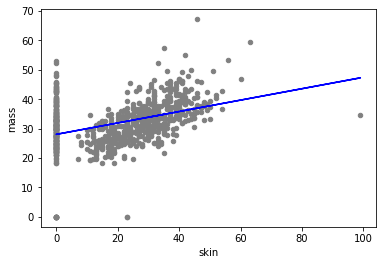

In [15]:
ax = df.plot(x='skin', y='mass', kind="scatter",c='grey')
plt.plot(df['skin'], intercept + slope*df['skin'], 'b', label='Fitted treated line')
plt.show()

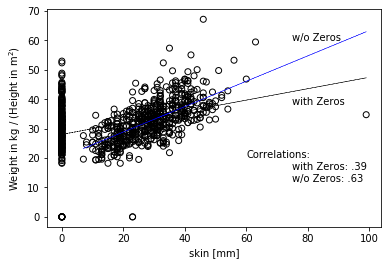

In [16]:
#brush up the plot
plt.scatter(x=df['skin'], y=df['mass'], facecolors='none', edgecolors='black')
plt.plot(df['skin'], intercept + slope*df['skin'], linewidth=0.5, linestyle="--", color='black')
plt.plot(df_skin_woz['skin'], intercept_skin_woz + slope_skin_woz*df_skin_woz['skin'], linewidth=0.5, linestyle="--", color='blue')
plt.text(75,38, 'with Zeros')
plt.text(75,60, 'w/o Zeros')
plt.text(60,20, 'Correlations:')
plt.text(75,16, 'with Zeros: .39')
plt.text(75,12, 'w/o Zeros: .63')
plt.xlabel('skin [mm]')
plt.ylabel(r'Weight in kg / (Height in m$\mathregular{^{2}}$)')
#plt.show()
plt.rc('font', size=10) 
plt.savefig('regression.png')

In [ ]:
Observation
Quite a different slope, higher values not ideally represented bz the with zeros set

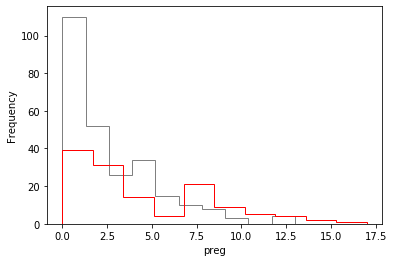

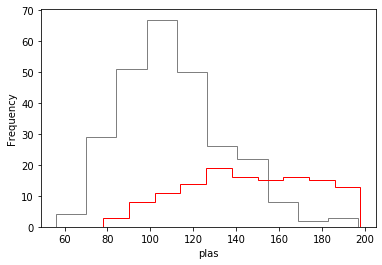

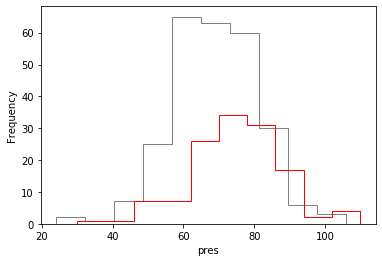

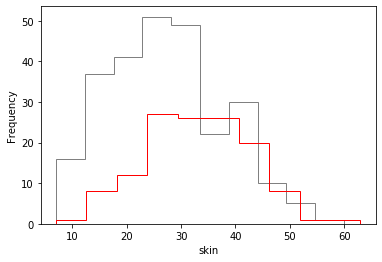

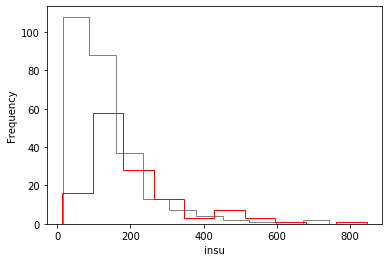

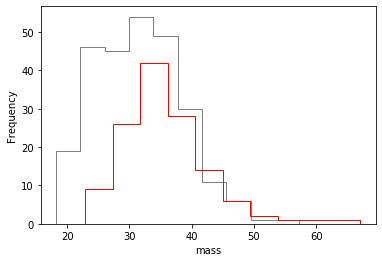

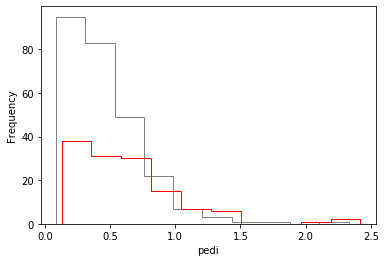

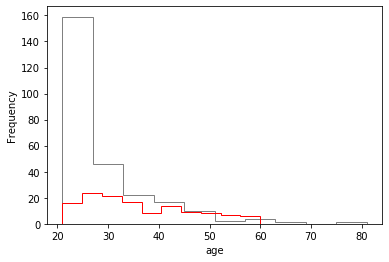

In [57]:
#lets redo the histograms on the dataset without zeros
for i in range(len(df.columns)-1):
    plt.figure()
    plt.hist(df_tneg_woz[df_tneg_woz.columns[i]], color = 'grey', histtype='step')
    plt.hist(df_tpos_woz[df_tpos_woz.columns[i]], color = 'r', histtype='step')
    plt.ylabel('Frequency')
    plt.xlabel(df_woz.columns[i])

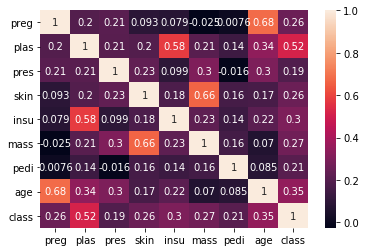

In [58]:
#lets redo corr
corr2= df_woz.corr()
sns.heatmap(corr2,annot=True)

Obeservation
Gives a different picture

Learning / reflection 
1 - If there is an article about the data read it
2 - Look at the data and the metadata dilligently, like units of measures, distribution, otherwise wrong conclusions/interpretations might happen quite quickly
3 - It's an iterative approach, you start, then you look at something else, explore new things and might go back 
4 - Coming up with a clear interpretation from the descriptive statistics / visualizations is not always that straight forward, you cannot claim that this is how "the data behaves, is its inner nature, what is the real pattern we see here"